In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=10, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)

print("Ridge coefficients:", ridge.coef_)
print("Lasso coefficients:", lasso.coef_)
print("ElasticNet coefficients:", elastic.coef_)

Ridge coefficients: [18.7837851  17.2002802  82.29780165 93.32140698  8.49381922 14.69515372
 10.81410166 78.52604809 58.77162176 73.43432707]
Lasso coefficients: [18.8759585  17.02295876 83.29528206 94.67105062  8.57131832 14.46648204
 11.12484688 80.00236373 59.72768016 74.33496513]
ElasticNet coefficients: [18.19847174 17.37588292 79.41917154 89.58091573  8.02526637 15.12017837
  9.55379337 74.32427114 55.8699443  70.66851286]


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Train Random Forest with OOB enabled
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)

# Print OOB accuracy
print("OOB Score (Accuracy):", model.oob_score_)

OOB Score (Accuracy): 0.961335676625659


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X = data.data

# Step 1: Standardize
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762 0.03668922]


In [38]:
import pandas as pd

data = pd.read_csv("../data/BMI.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [39]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

X = data[['Gender', 'Height', 'Weight']]
X_scaled = StandardScaler().fit_transform(X)
df_x_scale = pd.DataFrame(X_scaled)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

  feature       VIF
0  Gender  1.000403
1  Height  1.000313
2  Weight  1.000091


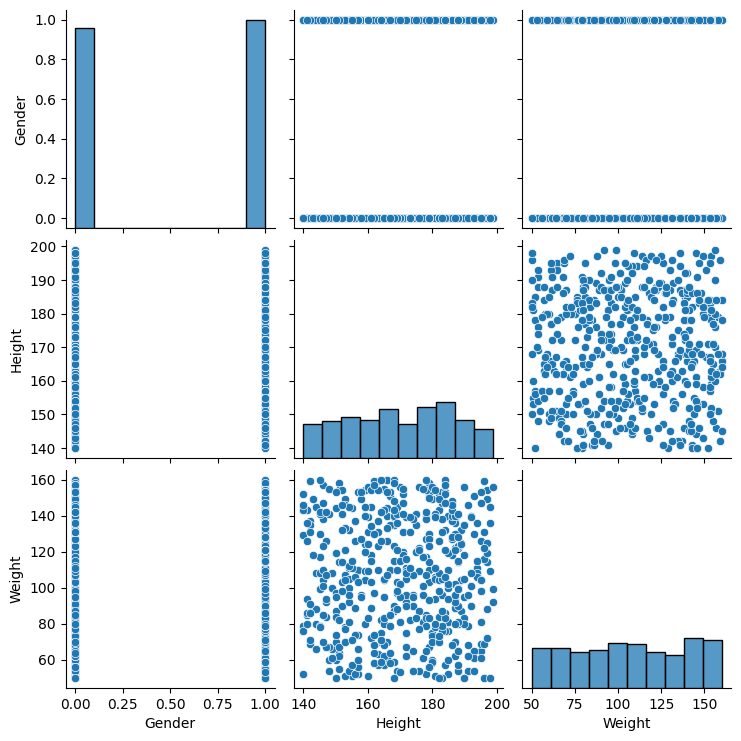

In [41]:
import seaborn as sns
sns.pairplot(X)

<Axes: >

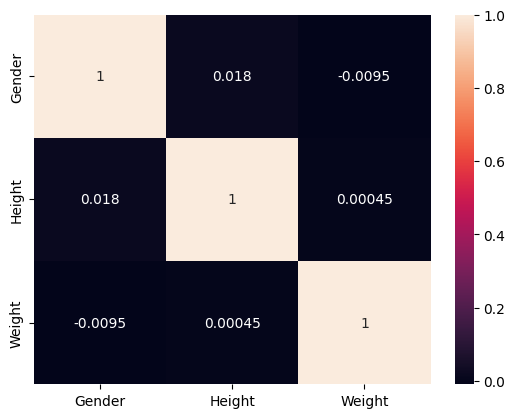

In [42]:
sns.heatmap(X.corr(),annot=True)

In [43]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.33996503 0.33345745 0.32657752]


Feature Selection

    Filter Methode

In [6]:
# Information Gain

from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

x,y = load_iris(return_X_y=True)

imp = mutual_info_classif(x,y)

for i, score in enumerate(imp):
    print(f"Feature {i}: Info Gain = {score:.4f}")

Feature 0: Info Gain = 0.4811
Feature 1: Info Gain = 0.2235
Feature 2: Info Gain = 0.9791
Feature 3: Info Gain = 0.9942


In [8]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

here petal lenght and petal width is with high information gain which stat that it more relavent to target variable 

In [9]:
# chi square test

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(x) # chi2 required non -ve values

select = SelectKBest(score_func=chi2,k=2) # k is the number of top feature to select
x_new = select.fit_transform(x,y)

print('select feature', select.get_support())

select feature [False False  True  True]


In [11]:
# another way for chi2 test

import pandas as pd
from scipy.stats import chi2_contingency

# Sample categorical data
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Buys': ['Yes', 'No', 'Yes', 'Yes', 'No']
})

cross = pd.crosstab(data['Gender'],data['Buys'])
chi2, p, df, exp = chi2_contingency(cross)

print(f"Chi2 Score: {chi2}")
print(f"P-value: {p}")

Chi2 Score: 0.0
P-value: 1.0


In [12]:
# Fisher Score

import numpy as np
from sklearn.datasets import load_iris

def fisher_score(X, y):
    scores = []
    classes = np.unique(y)
    for i in range(X.shape[1]):
        numerator = 0
        denominator = 0
        for c in classes:
            X_c = X[y == c, i]
            numerator += len(X_c) * (np.mean(X_c) - np.mean(X[:, i]))**2
            denominator += np.sum((X_c - np.mean(X_c))**2)
        scores.append(numerator / denominator)
    return scores

# Load dataset
X, y = load_iris(return_X_y=True)
scores = fisher_score(X, y)

for i, score in enumerate(scores):
    print(f"Feature {i}: Fisher Score = {score:.4f}")

Feature 0: Fisher Score = 1.6226
Feature 1: Fisher Score = 0.6688
Feature 2: Fisher Score = 16.0566
Feature 3: Fisher Score = 13.0613


                   sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.817941
sepal width (cm)           -0.117570  ...         -0.366126
petal length (cm)           0.871754  ...          0.962865
petal width (cm)            0.817941  ...          1.000000

[4 rows x 4 columns]


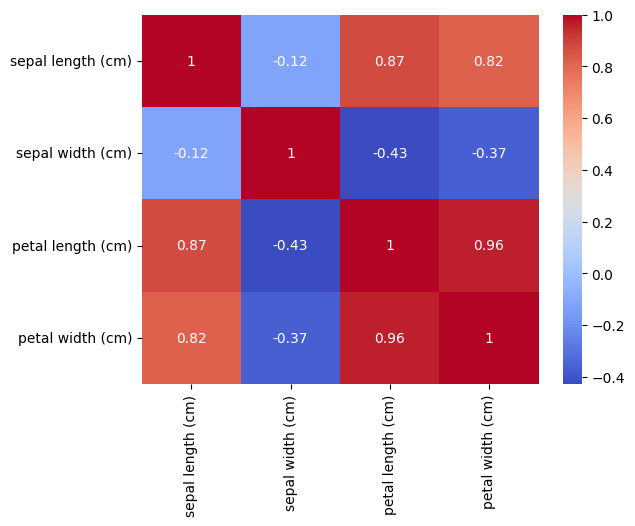

In [15]:
# Person colenear coefficent

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)

# Pearson correlation matrix
corr = df.corr(method='pearson')
print(corr)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [20]:
# Variance Thershold

from sklearn.feature_selection import VarianceThreshold
import numpy as np

X = np.array([
    [0, 1, 2],
    [0, 1, 2],
    [0, 0, 2],
    [0, 1, 2],
    [0, 1, 2]
])

vari = VarianceThreshold(threshold=0.1)
x_select = vari.fit_transform(X)

print(vari.get_support())

[False  True False]


In [22]:
# MAD - Mean Adsolute Difference

import numpy as np

def mean_absolute_difference(X):
    return np.mean(np.abs(X - np.mean(X, axis=0)), axis=0)

# Sample dataset
X = np.array([
    [10, 5],
    [10, 7],
    [10, 9]
])

mad = mean_absolute_difference(X)
print("MAD for each feature:", mad)

MAD for each feature: [0.         1.33333333]


In [23]:
# Dispers Ratio

import numpy as np

def disperse_ratio(X, y):
    classes = np.unique(y)
    ratios = []
    for i in range(X.shape[1]):
        means = []
        stds = []
        for c in classes:
            X_c = X[y == c, i]
            means.append(np.mean(X_c))
            stds.append(np.std(X_c))
        numerator = abs(means[0] - means[1])
        denominator = stds[0] + stds[1]
        ratio = numerator / denominator if denominator != 0 else 0
        ratios.append(ratio)
    return ratios

# Example usage
X = np.array([
    [10, 5],
    [11, 6],
    [30, 6],
    [32, 7]
])
y = np.array([0, 0, 1, 1])

print("Disperse ratios:", disperse_ratio(X, y))

Disperse ratios: [np.float64(13.666666666666666), np.float64(1.0)]


    Wrapper Methode

In [29]:
# Forwoard Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

x,y = load_iris(return_X_y=True)

model = LogisticRegression()

sfs = SFS(model,
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs.fit(x,y)

print('Feature Selection ', sfs.k_feature_idx_)

Feature Selection  (0, 2, 3)


provide the index of the Featues Name

In [31]:
# Backword Elimination

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

x,y = load_iris(return_X_y=True)

model = LogisticRegression(max_iter=1000)

sfs = SFS(model,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs.fit(x,y)

print('Feature Selection ', sfs.k_feature_idx_)

Feature Selection  (0, 2, 3)


In [33]:
# RFE - Recurcive Feature Elimination 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

x,y = load_iris(return_X_y=True)

model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=model,n_features_to_select=2)

rfe.fit(x,y)

print(f'Select Feature {rfe.support_}')
print(f'Feature ranke {rfe.ranking_}')

Select Feature [False False  True  True]
Feature ranke [3 2 1 1]
